In [1]:
import wotplot
from matplotlib import pyplot

# 1. The simple example from the README

## 1.1. Define a small dataset

Adapted from Figure 6.20 in Chapter 6 of _Bioinformatics Algorithms_ (Compeau & Pevzner), edition 2.

In [2]:
s1 = "AGCAGGAGATAAACCTGT"
s2 = "AGCAGGTTATCTACCTGT"
k = 3

## 1.2. Create a dot plot matrix

In [3]:
m = wotplot.DotPlotMatrix(s1, s2, k)

## 1.3. Inspect the dot plot matrix

In [4]:
type(m)

wotplot._matrix.DotPlotMatrix

In [5]:
m

DotPlotMatrix(mat=<16x16 sparse matrix of type '<class 'numpy.int64'>'
	with 18 stored elements in COOrdinate format>, k=3, yorder="BT", binary=True)

In [6]:
print(str(m))

DotPlotMatrix(k = 3, binary, bottom → top): 16 x 16


The `DotPlotMatrix` object we just created, `m`, contains some extra information about the way it was created (e.g. the value of `k` we used). But the most interesting part of it is the actual matrix describing the dot plot! This matrix is stored in the `mat` attribute.

In [7]:
m.mat

<16x16 sparse matrix of type '<class 'numpy.int64'>'
	with 18 stored elements in COOrdinate format>

### 1.3.1. Why is this matrix 16x16? Shouldn't it be 18x18?

You might have noticed that `s1` and `s2` are 18 nucleotides long. Why, then, does `m.mat` only have 16 rows and 16 columns?

The reason for this is that, in an arbitrary string $s$, the number of $k$-mers is $|s| - k + 1$. For `s1` and `s2`, $|s| - k + 1 = 18 - 3 + 1 = 16$.

### 1.3.2. What's the deal with sparse matrices?

Most dot plot matrices are _sparse_: that is, most of their entries are zeroes. We exploit this by storing `m.mat` in a [sparse matrix format](https://en.wikipedia.org/wiki/Sparse_matrix)—this drastically reduces the memory requirements when our input sequences are long (more than a few thousand nucleotides).

#### Sidenote about the matrix type
Depending on the version of SciPy you have installed, `m.mat` will be of type [`scipy.sparse.coo_matrix`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.coo_matrix.html) (SciPy < 1.8) or type [`scipy.sparse.coo_array`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.coo_array.html) (SciPy ≥ 1.8). There shouldn't be much of a difference, at least for our use of these objects.

In [8]:
import scipy
print(f"This notebook is using SciPy version {scipy.__version__}.")

This notebook is using SciPy version 1.5.2.


In [9]:
type(m.mat)

scipy.sparse.coo.coo_matrix

It's possible to convert `m.mat` from this sparse format to an equivalent "dense" foramt; this can make the matrix easier to work with, although it might require a large amount of memory if your input sequences were long. (For relatively small sequences like `s1` and `s2`, though, we should be fine.)

Here's an example of creating a dense version of `m.mat`:

In [10]:
m.mat.toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In the above matrix, `0` values represent cells where there aren't any forward or reverse-complement $k$-mer matches, and `1` values represent cells where there is at least one such match.

For more details about these values, you can run `help(wotplot.DotPlotMatrix)`.

## 1.4. Visualize the dot plot matrix

### 1.4.1. Available visualization functions
Currently, we provide two functions for visualizing these matrices: `viz_imshow()` and `viz_spy()`. Both of these are essentially wrappers for matplotlib's [`imshow()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.imshow.html) and [`spy()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.spy.html) functions; you can even provide additional keyword arguments to `viz_imshow()` and `viz_spy()` which will be passed directly to `imshow()` / `spy()`. 

A brief description of the differences between these functions:

- `imshow()` produces visually appealing plots (cells are scaled perfectly within the plot; supports multiple colors, which helps us visualize not-binary matrices). However, it doesn't support sparse matrices. So, `viz_imshow()` converts the sparse matrix to a dense format -- this can require a lot of memory if your input sequences were long.


- `spy()` produces plots that are a bit less pretty than `imshow()`'s (at least at first -- you can still make them look nice with some tweaking, e.g. adjusting the `markersize` parameter to scale match cells' sizes up/down), but it works with sparse matrices and is thus much more memory-efficient.

So, I recommend using `viz_imshow()` for short sequences (e.g. < 500 nt each) and `viz_spy()` for longer sequences.

### 1.4.2. `viz_imshow()`

First, let's use `viz_imshow()` -- our sequences here are very short, so the total cost of storing a dense 16 x 16 = 256-cell matrix in memory is small.

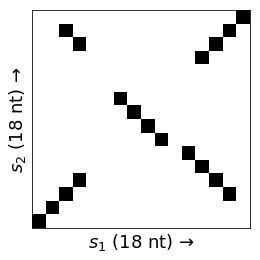

In [11]:
fig, ax = wotplot.viz_imshow(m)
# Save the visualization to a file
fig.savefig("example_dotplot.png", bbox_inches="tight")

### 1.4.3. For comparison's sake: `viz_spy()`

The default `markersize` used by `viz_spy()` is `0.5`. I set this as the default because it's useful for plots of very long sequences; however, it's less useful for plots of tiny sequences like this one.

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='$s_1$ (18 nt) →', ylabel='$s_2$ (18 nt) →'>)

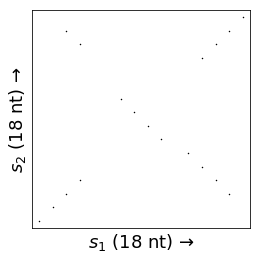

In [12]:
wotplot.viz_spy(m)

We can adjust the `markersize` when we call `viz_spy()`, which makes this visualization look essentially the same as what we'd get from `viz_imshow()`:

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='$s_1$ (18 nt) →', ylabel='$s_2$ (18 nt) →'>)

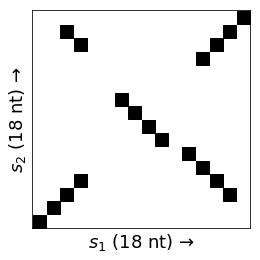

In [13]:
wotplot.viz_spy(m, markersize=13)

# 2. Visualizing not-binary matrices in color

Since not-binary dot plot matrices distinguish between forward, reverse-complementary, and palindromic matches, we can color these matches differently in the visualization! `viz_imshow()` will automatically do this for you.

## 2.1. The same dataset as above

The default colormap used colors non-match cells white, forward match cells red, reverse-complementary match cells blue, and palindromic match cells purple. This is based on Figure 6.20 in Chapter 6 of _Bioinformatics Algorithms_ (Compeau & Pevzner), edition 2.

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='$s_1$ (18 nt) →', ylabel='$s_2$ (18 nt) →'>)

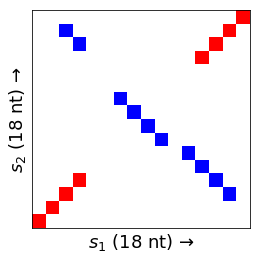

In [14]:
b = wotplot.DotPlotMatrix(s1, s2, k, binary=False)
wotplot.viz_imshow(b)

Note that `viz_spy()` can only use one color for all match cells (by default this is set to black), so visualizing a not-binary matrix with `viz_spy()` doesn't look different from visualizing the equivalent binary matrix:

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='$s_1$ (18 nt) →', ylabel='$s_2$ (18 nt) →'>)

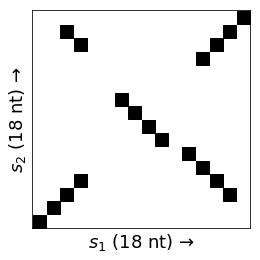

In [15]:
wotplot.viz_spy(b, markersize=13)

## 2.2. Another dataset that includes palindromes

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='$s_1$ (21 nt) →', ylabel='$s_2$ (21 nt) →'>)

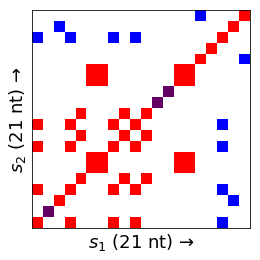

In [16]:
p = wotplot.DotPlotMatrix("AGCAGAAAGAGATAAACCTGT", "AGCAGAAAGAGATAAACCTGT", 2, binary=False)
wotplot.viz_imshow(p)

## 2.3. Adjusting the colormap used

We can adjust this with the `nbcmap` parameter of `viz_imshow()`, which is a `dict` mapping cell values (0, 1, -1, 2) to RGB triplet colors.

Here, we can use `nbcmap` to create "dark mode" dot plots:

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='$s_1$ (21 nt) →', ylabel='$s_2$ (21 nt) →'>)

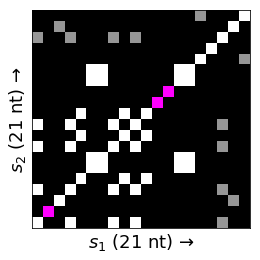

In [17]:
# it's gamer time
dark_mode_cmap = {0: [0, 0, 0], 1: [255, 255, 255], -1: [150, 150, 150], 2: [255, 0, 255]}
wotplot.viz_imshow(p, nbcmap=dark_mode_cmap)

# 3. Tiling multiple dot plots

One of the main reasons I wrote this library was so that I could create figures containing grids of many dot plots using matplotlib. wotplot makes this process fairly painless!

Here's an example of creating a single figure containing two side-by-side dot plots. For our second dot plot we'll reuse the original dataset from above but, this time, set `yorder="TB"` -- this will have the effect of "flipping" the y-axis so that the second sequence begins at the top and ends at the bottom of the plot. This is analogous to how [Gepard](https://academic.oup.com/bioinformatics/article/23/8/1026/198110)'s dot plots look.

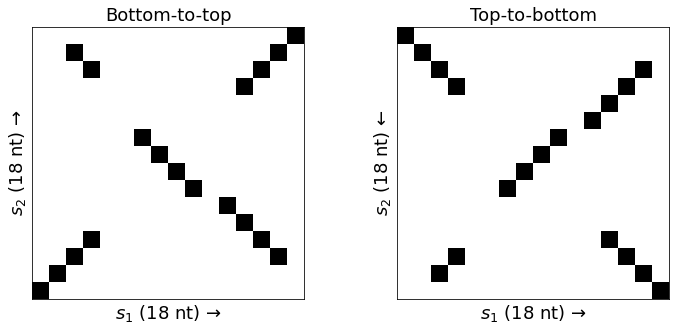

In [18]:
# Second dot plot: same as the original, but different y-order
m_flipped = wotplot.DotPlotMatrix(s1, s2, k, yorder="TB")

fig, (axLeft, axRight) = pyplot.subplots(1, 2)

# Notice how we provide an argument to the ax parameters of these functions.
# This way, we can create these Axes objects in advance (when we call
# pyplot.subplots()).
wotplot.viz_imshow(m, ax=axLeft)
wotplot.viz_imshow(m_flipped, ax=axRight)

axLeft.set_title('Bottom-to-top', fontsize=18)
axRight.set_title('Top-to-bottom', fontsize=18)
fig.set_size_inches(12, 5)

# 4. Passing arbitrary keyword arguments to `imshow()` / `spy()`

These functions have a lot of options available (see the matplotlib docs for [`imshow()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.imshow.html) and [`spy()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.spy.html)), and we can make use of these options without too much effort:

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='$s_1$ (18 nt) →', ylabel='$s_2$ (18 nt) →'>)

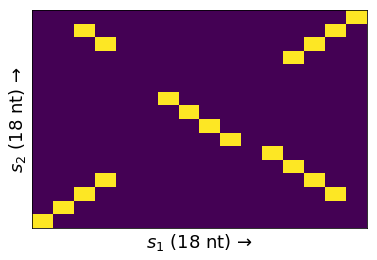

In [19]:
# - Set cmap to "viridis" (by default, viz_imshow() sets cmap to "gray_r" for binary matrices, but we can
#   override this here).
# - Set aspect to "auto", which lets cells be non-square (their dimensions will adjust as we resize the plot).
wotplot.viz_imshow(m, cmap="viridis", aspect="auto")

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='$s_1$ (18 nt) →', ylabel='$s_2$ (18 nt) →'>)

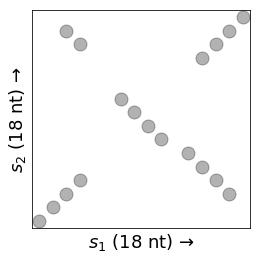

In [20]:
# - Set marker to "o" (draw circles instead of squares for matching cells).
# - Set alpha to 0.3 (add some transparency to the matching cells).
wotplot.viz_spy(m, markersize=13, marker="o", alpha=0.3)